In [ ]:
#Dataset taken from https://www.kaggle.com/ahmethoso/wpp-population-by-age-and-sex

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import os
import warnings
import statsmodels.api as sm

#%matplotlib inline 
warnings.filterwarnings('ignore')

# Show all dataframe

In [96]:
data_file = "PopulationByAgeSex.csv"

df0 = pd.read_csv(data_file) 
df0.head(5) #show 3 rows

,Id,LocID,Location,Time,PopMale_0_4,PopFemale_0_4,PopTotal_0_4,PopMale_5_9,PopFemale_5_9,PopTotal_5_9,...,PopMale_95_99,PopFemale_95_99,PopTotal_95_99,PopMale_100Plus,PopFemale_100Plus,PopTotal_100Plus,PopMale,PopFemale,PopTotal,YearDataCompleted
0,1,4,Afghanistan,1950,630.044,661.578,1291.622,516.206,487.335,1003.541,...,0.004,0.003,0.007,0.0,0.0,0.0,4099.243,3652.874,7752.117,1
1,2,4,Afghanistan,1951,641.199,673.293,1314.492,525.302,502.402,1027.704,...,0.007,0.005,0.012,0.0,0.0,0.0,4134.756,3705.395,7840.151,1
2,3,4,Afghanistan,1952,650.825,669.274,1320.099,533.097,521.672,1054.769,...,0.012,0.009,0.021,0.0,0.0,0.0,4174.450,3761.546,7935.996,1
3,4,4,Afghanistan,1953,659.896,663.606,1323.502,538.351,541.216,1079.567,...,0.015,0.013,0.028,0.0,0.0,0.0,4218.336,3821.348,8039.684,1
4,5,4,Afghanistan,1954,670.694,663.295,1333.989,540.820,557.196,1098.016,...,0.014,0.011,0.025,0.0,0.0,0.0,4266.484,3884.832,8151.316,1


In [97]:
print(list(df0.columns))

['Id', 'LocID', 'Location', 'Time', 'PopMale_0_4', 'PopFemale_0_4', 'PopTotal_0_4', 'PopMale_5_9', 'PopFemale_5_9', 'PopTotal_5_9', 'PopMale_10_14', 'PopFemale_10_14', 'PopTotal_10_14', 'PopMale_15_19', 'PopFemale_15_19', 'PopTotal_15_19', 'PopMale_20_24', 'PopFemale_20_24', 'PopTotal_20_24', 'PopMale_25_29', 'PopFemale_25_29', 'PopTotal_25_29', 'PopMale_30_34', 'PopFemale_30_34', 'PopTotal_30_34', 'PopMale_35_39', 'PopFemale_35_39', 'PopTotal_35_39', 'PopMale_40_44', 'PopFemale_40_44', 'PopTotal_40_44', 'PopMale_45_49', 'PopFemale_45_49', 'PopTotal_45_49', 'PopMale_50_54', 'PopFemale_50_54', 'PopTotal_50_54', 'PopMale_55_59', 'PopFemale_55_59', 'PopTotal_55_59', 'PopMale_60_64', 'PopFemale_60_64', 'PopTotal_60_64', 'PopMale_65_69', 'PopFemale_65_69', 'PopTotal_65_69', 'PopMale_70_74', 'PopFemale_70_74', 'PopTotal_70_74', 'PopMale_75_79', 'PopFemale_75_79', 'PopTotal_75_79', 'PopMale_80_84', 'PopFemale_80_84', 'PopTotal_80_84', 'PopMale_85_89', 'PopFemale_85_89', 'PopTotal_85_89', 'Pop

In [98]:
df0.shape

(66893, 71)

# Column selection

In [99]:
#Choose some columns to be observed

df = df0[['Id','LocID','Location','Time','PopMale_0_4','PopFemale_0_4','PopTotal_0_4',
          'PopMale_100Plus','PopFemale_100Plus','PopTotal_100Plus']]
#df.head(66893)
df.head(5)

,Id,LocID,Location,Time,PopMale_0_4,PopFemale_0_4,PopTotal_0_4,PopMale_100Plus,PopFemale_100Plus,PopTotal_100Plus
0,1,4,Afghanistan,1950,630.044,661.578,1291.622,0.0,0.0,0.0
1,2,4,Afghanistan,1951,641.199,673.293,1314.492,0.0,0.0,0.0
2,3,4,Afghanistan,1952,650.825,669.274,1320.099,0.0,0.0,0.0
3,4,4,Afghanistan,1953,659.896,663.606,1323.502,0.0,0.0,0.0
4,5,4,Afghanistan,1954,670.694,663.295,1333.989,0.0,0.0,0.0


# Show empty values & Imputation

In [100]:
print(df.isnull().sum())

Id                   0
LocID                0
Location             0
Time                 0
PopMale_0_4          0
PopFemale_0_4        0
PopTotal_0_4         0
PopMale_100Plus      0
PopFemale_100Plus    0
PopTotal_100Plus     0
dtype: int64


In [101]:
#Location highest counts
diff_frame = df[df["Location"] != df["Location"]]
numDiffjob = diff_frame.shape[0]

#make unique, rename,sort
levels = df["Location"].unique()
CountF = df.groupby("Location",as_index = False)["Id"].count()
CountF = CountF.rename(columns = {"Id":"count"})
CountF = CountF.sort_values("count",ascending = False)

#highest counts
CountF["density"] = (CountF["count"] /np.sum(CountF["count"]))
CountF["rank"] = range(CountF.shape[0])
CountF["logRank"] = np.log(CountF["rank"] + 1)

top_Level = 5
top_5 = CountF.iloc[0:top_Level,:].loc[:,["Location","count"]]
display(top_5)

,Location,count
222,Latin America and the Caribbean,302
162,Europe,302
291,Northern America,302
289,Northern Africa,151
300,Organization of Petroleum Exporting countries ...,151


In [102]:
df["Location"].value_counts()

Latin America and the Caribbean                         302
Europe                                                  302
Northern America                                        302
Northern Africa                                         151
Organization of Petroleum Exporting countries (OPEC)    151
                                                       ... 
ESCWA: member countries                                 151
ESCWA: Mashreq countries                                151
ESCWA: Maghreb countries                                151
ESCWA: Gulf Cooperation Council countries               151
Zimbabwe                                                151
Name: Location, Length: 440, dtype: int64

# Dataset Types

In [103]:
print(df.dtypes)

Id                     int64
LocID                  int64
Location              object
Time                   int64
PopMale_0_4          float64
PopFemale_0_4        float64
PopTotal_0_4         float64
PopMale_100Plus      float64
PopFemale_100Plus    float64
PopTotal_100Plus     float64
dtype: object


In [104]:
#Population count for baby 0 - 4 years old
df["PopTotal_0_4"].value_counts()

167794.641    5
179137.337    5
178520.201    5
178327.023    5
178128.235    5
             ..
12804.219     1
12658.398     1
12513.871     1
12372.521     1
1860.469      1
Name: PopTotal_0_4, Length: 61263, dtype: int64

In [105]:
#Population count for senior 100 years old and above
df["PopTotal_100Plus"].value_counts()

0.000      3166
0.001      1170
0.003       878
0.002       828
0.004       659
           ... 
964.428       1
957.512       1
952.651       1
946.682       1
2.956         1
Name: PopTotal_100Plus, Length: 27912, dtype: int64

# Location, Variability, Distribution

In [356]:
df1 = df.drop(['Location'], axis = 1)
df1.describe()

,Id,LocID,Time,PopMale_0_4,PopFemale_0_4,PopTotal_0_4,PopMale_100Plus,PopFemale_100Plus,PopTotal_100Plus
count,66893.000000,66893.000000,66893.000000,66893.000000,66893.000000,66893.000000,66893.000000,66893.000000,66893.000000
mean,33447.000000,1077.688488,2025.000000,28467.893812,27006.915349,55474.810893,98.241300,232.310081,330.551003
std,19310.490115,729.078408,43.589315,59177.415570,56044.572681,115217.628450,408.582213,912.706142,1319.731076
min,1.000000,4.000000,1950.000000,0.545000,0.512000,1.057000,0.000000,0.000000,0.000000
25%,16724.000000,462.000000,1987.000000,289.002000,278.516000,567.961000,0.024000,0.071000,0.097000
50%,33447.000000,922.000000,2025.000000,2913.602000,2810.628000,5733.857000,0.620000,1.969000,2.655000
75%,50170.000000,1596.000000,2063.000000,25678.971000,24616.830000,50286.954000,11.863000,35.363000,47.608000
max,66893.000000,5501.000000,2100.000000,353513.778000,337291.095000,690803.598000,6214.181000,12878.515000,19092.696000


In [384]:
#Mean babies
babies = df1['PopMale_0_4']
babies_mean = statistics.mean(babies)
print(f'mean of babies 0-4 years old : {babies_mean}')

#Mean Oldest age
oldest = df1['PopTotal_100Plus']
oldest_mean = statistics.mean(oldest)
print(f'mean of above 100 years old : {oldest_mean}')

mean of babies 0-4 years old : 28467.893811654434
mean of above 100 years old : 330.55100282540775


In [385]:
#Median babies
babies = df1['PopMale_0_4']
babies_median = statistics.median(babies)
print(f'median of babies 0-4 years old : {babies_median}')

#Median Oldest age
oldest = df1['PopTotal_100Plus']
oldest_median = statistics.median(oldest)
print(f'median of above 100 years old : {oldest_median}')

median of babies 0-4 years old : 2913.602
median of above 100 years old : 2.655


# Standard Deviation, Variance

In [387]:
#Standard Deviation babies
babies = df1['PopMale_0_4']
babies_stdev = statistics.stdev(babies)
print(f'standard deviation of babies 0-4 years old : {babies_stdev}')

#Standard Deviation Oldest age
oldest = df1['PopTotal_100Plus']
oldest_stdev = statistics.stdev(oldest)
print(f'standard deviation of above 100 years old : {oldest_stdev}')

standard deviation of babies 0-4 years old : 59177.41556979574
standard deviation of above 100 years old : 1319.7310764287752


In [388]:
#Variance of babies
babies = df1['PopMale_0_4']
babies_variance = statistics.variance(babies)
print(f'variance of babies 0-4 years old : {babies_variance}')

#Variance of Oldest age
oldest = df1['PopTotal_100Plus']
oldest_variance = statistics.variance(oldest)
print(f'variance of above 100 years old : {oldest_variance}')

variance of babies 0-4 years old : 3501966513.5203032
variance of above 100 years old : 1741690.1140918534


In [389]:
# generate sample data
x = df[['PopTotal_0_4']].values # values for X  
y = df[['PopTotal_100Plus']].values # values for Y

In [343]:
X = np.stack((x, y), axis=0)

In [344]:
var_X = np.var(X)
var_X

7398544908.164617

# Covariance and Correlation

In [267]:
df.corr()

,Id,LocID,Time,PopMale_0_4,PopFemale_0_4,PopTotal_0_4,PopMale_100Plus,PopFemale_100Plus,PopTotal_100Plus
Id,1.000000,1.135797e-01,2.287860e-03,0.089909,0.091004,0.090445,0.047050,0.045241,0.045854
LocID,0.113580,1.000000e+00,1.769177e-14,0.346884,0.346930,0.346920,0.169109,0.178830,0.176031
Time,0.002288,1.769177e-14,1.000000e+00,0.044264,0.045046,0.044646,0.300198,0.303227,0.302647
PopMale_0_4,0.089909,3.468844e-01,4.426448e-02,1.000000,0.999848,0.999964,0.417662,0.445320,0.437281
PopFemale_0_4,0.091004,3.469298e-01,4.504580e-02,0.999848,1.000000,0.999960,0.418997,0.446544,0.438541
PopTotal_0_4,0.090445,3.469196e-01,4.464621e-02,0.999964,0.999960,1.000000,0.418327,0.445932,0.437911
PopMale_100Plus,0.047050,1.691086e-01,3.001981e-01,0.417662,0.418997,0.418327,1.000000,0.994496,0.997371
PopFemale_100Plus,0.045241,1.788302e-01,3.032271e-01,0.445320,0.446544,0.445932,0.994496,1.000000,0.999474
PopTotal_100Plus,0.045854,1.760312e-01,3.026468e-01,0.437281,0.438541,0.437911,0.997371,0.999474,1.000000


In [268]:
df[['Time','PopTotal_0_4']].corr()

,Time,PopTotal_0_4
Time,1.000000,0.044646
PopTotal_0_4,0.044646,1.000000


In [269]:
df[['Time','PopTotal_100Plus']].corr()

,Time,PopTotal_100Plus
Time,1.000000,0.302647
PopTotal_100Plus,0.302647,1.000000


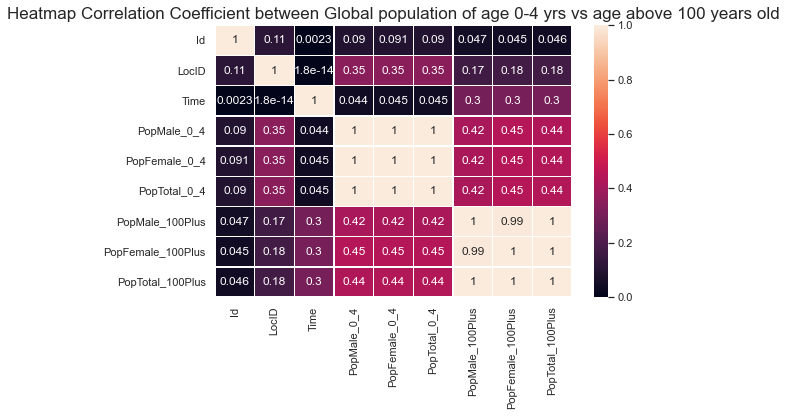

In [278]:
plt.figure(figsize=(8, 5)) # create figure  
sns.set_theme(style="whitegrid") 

# generate heatmap of correlation coefficients 
sns.heatmap(df.corr(),linewidths = .4, annot = True)  
plt.title("Heatmap Correlation Coefficient between Global population of age 0-4 yrs vs age above 100 years old", size = 17)
plt.show() # show figure  

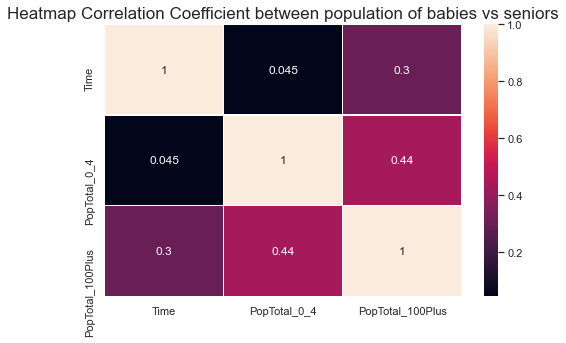

In [113]:
plt.figure(figsize=(8, 5)) # create figure  
sns.set_theme(style="whitegrid") 

# generate heatmap of correlation coefficients 
sns.heatmap(df[['Time','PopTotal_0_4','PopTotal_100Plus']].corr(),linewidths = .4, annot = True) 
plt.title("Heatmap Correlation Coefficient between population of babies vs seniors", size = 17)
plt.show() # show figure  

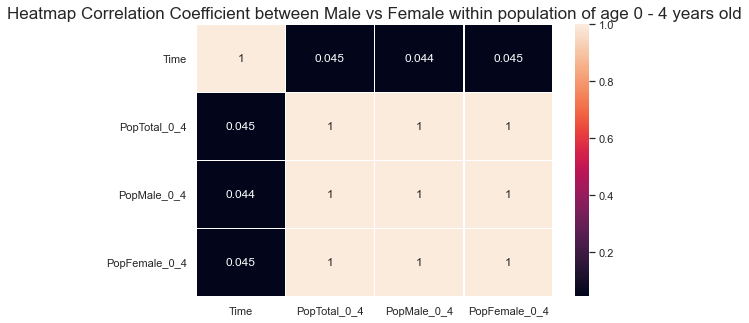

In [114]:
plt.figure(figsize=(8, 5)) # create figure  
sns.set_theme(style="whitegrid") 

# generate heatmap of correlation coefficients 
sns.heatmap(df[['Time','PopTotal_0_4','PopMale_0_4','PopFemale_0_4']].corr(),linewidths = .4, annot = True)  
plt.title("Heatmap Correlation Coefficient between Male vs Female within population of age 0 - 4 years old", size = 17)
plt.show() # show figure  

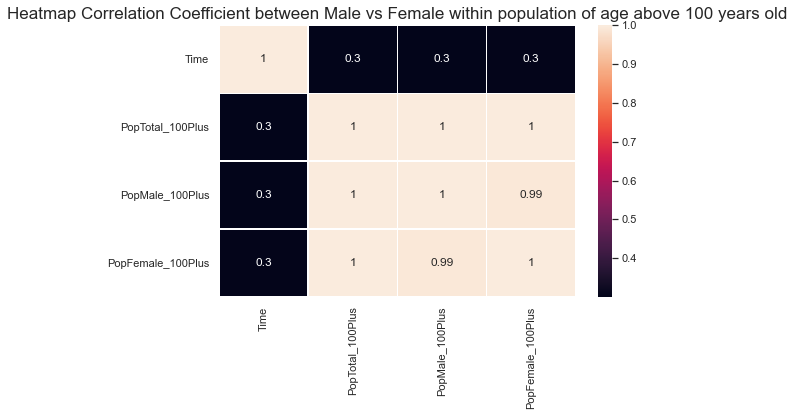

In [115]:
plt.figure(figsize=(8, 5)) # create figure  
sns.set_theme(style="whitegrid") 

# generate heatmap of correlation coefficients 
sns.heatmap(df[['Time','PopTotal_100Plus','PopMale_100Plus','PopFemale_100Plus']].corr(),linewidths = .4, annot = True)  
plt.title("Heatmap Correlation Coefficient between Male vs Female within population of age above 100 years old", size = 17)
plt.show() # show figure  

# Interesting Aspects Within Data

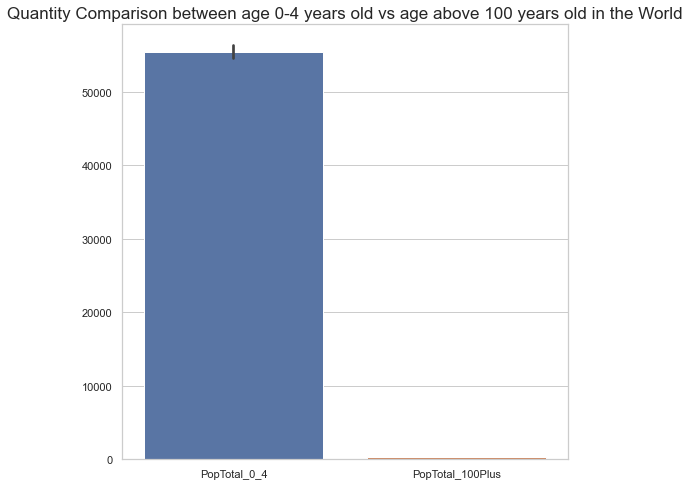

In [327]:
#Global cComparison between number of babies 0-4 years vs senior 100 years old and above
df2 = df[['PopTotal_0_4','PopTotal_100Plus']]
plt.figure(figsize=(8,8))
plt.title("Quantity Comparison between age 0-4 years old vs age above 100 years old in the World", size = 17)
#plt.rcParams["figure.figsize"] = [8, 8]
sns.set_theme(style="whitegrid")
sns.barplot(data=df2)
plt.show()

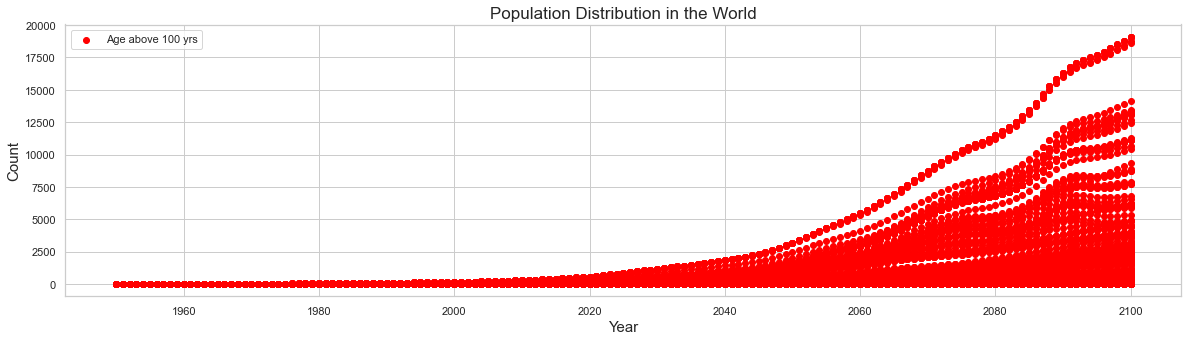

In [300]:
plt.title("Population Distribution of age above 100 years old in the World", size = 17)
plt.xlabel("Year", size =15)
plt.ylabel("Count", size =15)
plt.grid("True")

#plt.plot(df.Time, df.PopTotal_0_4, label = 'Age 0 - 4 yrs',color='blue') 
#plt.plot(df.Time, df.PopMale_a0_4, label = 'Male Age 0 - 4 yrs',color='green') 
#plt.plot(df.Time, df.PopFemale_0_4, label = 'Female Age 0 - 4 yrs',color='orange') 
plt.scatter(df.Time, df.PopTotal_100Plus, label = 'Age above 100 yrs' ,color='red')
plt.rcParams["figure.figsize"] = [20, 5]
plt.legend()

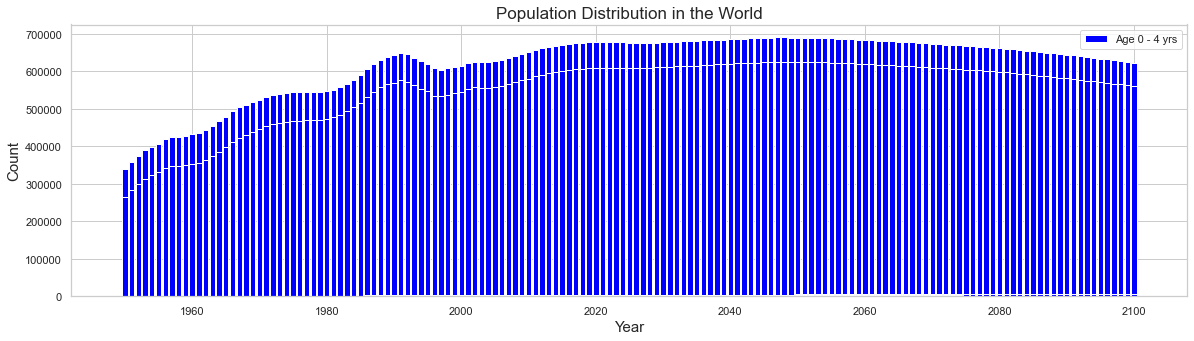

In [297]:
plt.title("Population Distribution of age 0 - 4 years old in the World", size = 17)
plt.xlabel("Year", size =15)
plt.ylabel("Count", size =15)
plt.grid("True")

plt.bar(df.Time, df.PopTotal_0_4, label = 'Age 0 - 4 yrs',color='blue') 

plt.rcParams["figure.figsize"] = [18, 5]
plt.legend()

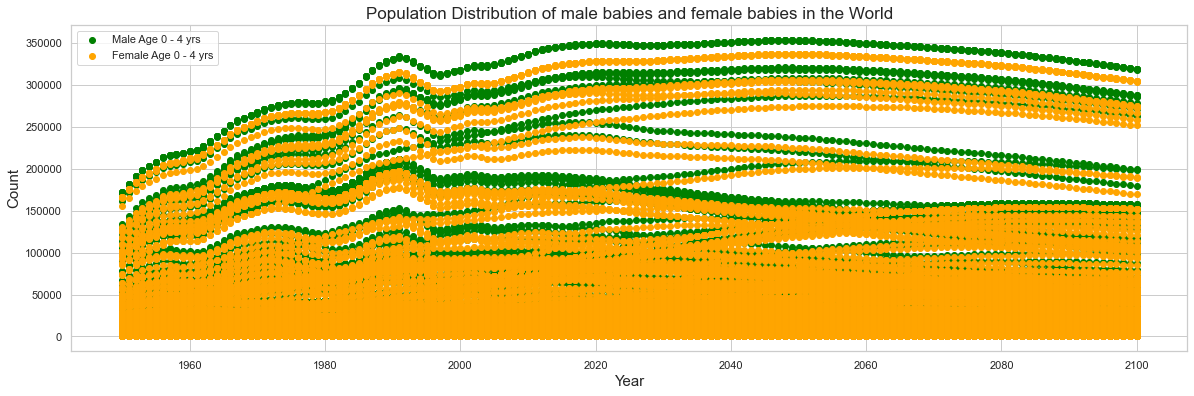

In [305]:
plt.title("Population Distribution of male babies and female babies in the World", size = 17)
plt.xlabel("Year", size =15)
plt.ylabel("Count", size =15)
plt.grid("True")

plt.scatter(df.Time, df.PopMale_0_4, label = 'Male Age 0 - 4 yrs',color='green') 
plt.scatter(df.Time, df.PopFemale_0_4, label = 'Female Age 0 - 4 yrs',color='orange') 

plt.rcParams["figure.figsize"] = [20,8]
plt.legend()

In [ ]:
#https://www.researchgate.net/publication/
#301564123_Shrinking_Regions_in_a_Shrinking_Country_The_Geography_of_Population_Decline_in_Lithuania_2001-2011
#https://www.worldatlas.com/articles/countries-with-shrinking-populations.html
#https://worldpopulationreview.com/country-rankings/countries-with-declining-population

In [279]:
#Observing Specific Location
dfLith = df[df['Location'] == 'Lithuania'].drop(["Id"],axis=1)
dfLith.head()

,LocID,Location,Time,PopMale_0_4,PopFemale_0_4,PopTotal_0_4,PopMale_100Plus,PopFemale_100Plus,PopTotal_100Plus
36995,440,Lithuania,1950,111.566,110.775,222.341,0.006,0.029,0.035
36996,440,Lithuania,1951,113.284,112.496,225.780,0.008,0.035,0.043
36997,440,Lithuania,1952,118.256,116.946,235.202,0.010,0.039,0.049
36998,440,Lithuania,1953,123.753,121.795,245.548,0.011,0.044,0.055
36999,440,Lithuania,1954,128.655,126.117,254.772,0.012,0.048,0.060


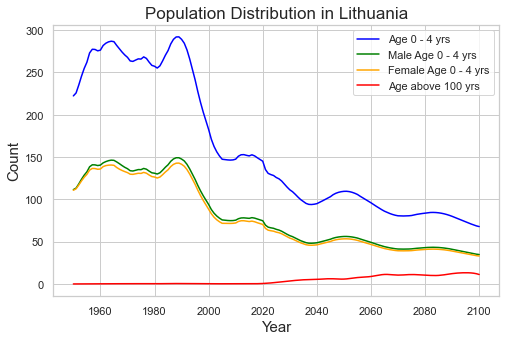

In [282]:
plt.title("Population Distribution in Lithuania", size = 17)
plt.xlabel("Year", size =15)
plt.ylabel("Count", size =15)
plt.grid("True")

plt.plot(dfLith.Time, dfLith.PopTotal_0_4, label = 'Age 0 - 4 yrs',color='blue') 
plt.plot(dfLith.Time, dfLith.PopMale_0_4, label = 'Male Age 0 - 4 yrs',color='green') 
plt.plot(dfLith.Time, dfLith.PopFemale_0_4, label = 'Female Age 0 - 4 yrs',color='orange') 
plt.plot(dfLith.Time, dfLith.PopTotal_100Plus, label = 'Age above 100 yrs' ,color='red')
plt.rcParams["figure.figsize"] = [8, 5]
plt.legend()

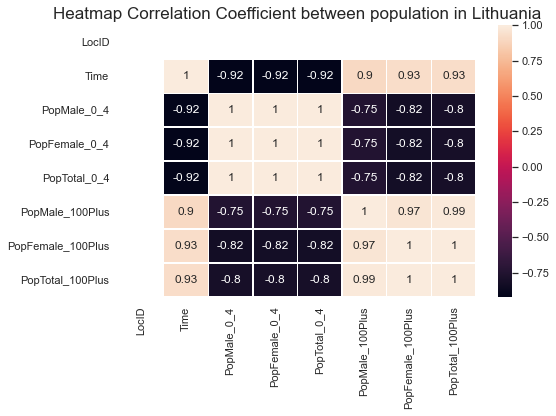

In [283]:
plt.figure(figsize=(8, 5)) # create figure  
sns.set_theme(style="whitegrid") 

# generate heatmap of correlation coefficients 
sns.heatmap(dfLith.corr(),linewidths = .4, annot = True)  
plt.title("Heatmap Correlation Coefficient between population in Lithuania", size = 17)
plt.show() # show figure  

In [271]:
#Observing Specific Location
dfJapan = df[df['Location'] == 'Japan'].drop(["Id"],axis=1)
dfJapan.head()

,LocID,Location,Time,PopMale_0_4,PopFemale_0_4,PopTotal_0_4,PopMale_100Plus,PopFemale_100Plus,PopTotal_100Plus
31408,392,Japan,1950,5718.489,5486.968,11205.457,0.034,0.083,0.117
31409,392,Japan,1951,5728.912,5479.801,11208.713,0.031,0.083,0.114
31410,392,Japan,1952,5543.762,5292.710,10836.472,0.028,0.084,0.112
31411,392,Japan,1953,5321.030,5074.268,10395.298,0.027,0.086,0.113
31412,392,Japan,1954,5101.222,4862.190,9963.412,0.025,0.088,0.113


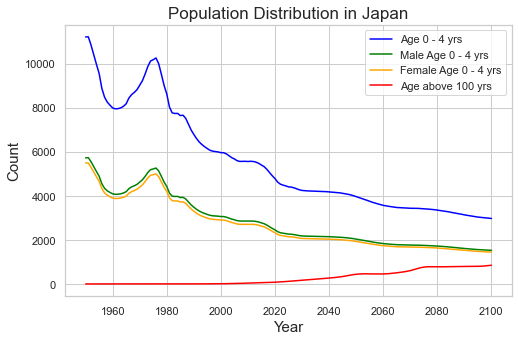

In [272]:
plt.title("Population Distribution in Japan", size = 17)
plt.xlabel("Year", size =15)
plt.ylabel("Count", size =15)
plt.grid("True")

plt.plot(dfJapan.Time, dfJapan.PopTotal_0_4, label = 'Age 0 - 4 yrs',color='blue') 
plt.plot(dfJapan.Time, dfJapan.PopMale_0_4, label = 'Male Age 0 - 4 yrs',color='green') 
plt.plot(dfJapan.Time, dfJapan.PopFemale_0_4, label = 'Female Age 0 - 4 yrs',color='orange') 
plt.plot(dfJapan.Time, dfJapan.PopTotal_100Plus, label = 'Age above 100 yrs' ,color='red')
plt.rcParams["figure.figsize"] = [8, 5]
plt.legend()
plt.show()

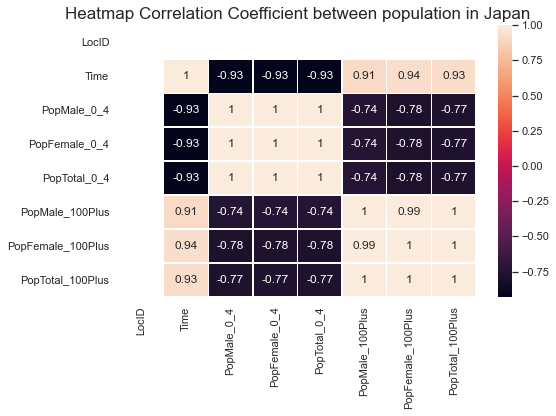

In [276]:
plt.figure(figsize=(8, 5)) # create figure  
sns.set_theme(style="whitegrid") 

# generate heatmap of correlation coefficients 
sns.heatmap(dfJapan.corr(),linewidths = .4, annot = True)  
plt.title("Heatmap Correlation Coefficient between population in Japan", size = 17)
plt.show() # show figure  

In [284]:
#https://theconversation.com/niger-has-the-worlds-highest-birth-rate-and-that-may-be-a-recipe-for-unrest-108654
#Niger has the world’s highest birth rate
#https://ideas4development.org/en/demographic-growth-niger/
#Current data suggests “a confirmed demographic explosion” in Niger

In [274]:
#Observing Population in Specific Location
dfNiger = df[df['Location'] == 'Niger'].drop(["Id"],axis=1)
dfNiger.head()

,LocID,Location,Time,PopMale_0_4,PopFemale_0_4,PopTotal_0_4,PopMale_100Plus,PopFemale_100Plus,PopTotal_100Plus
42884,562,Niger,1950,229.076,285.796,514.872,0.0,0.0,0.0
42885,562,Niger,1951,240.591,287.666,528.257,0.0,0.0,0.0
42886,562,Niger,1952,259.412,286.867,546.279,0.0,0.0,0.0
42887,562,Niger,1953,277.872,286.767,564.639,0.0,0.0,0.0
42888,562,Niger,1954,293.645,289.213,582.858,0.0,0.0,0.0


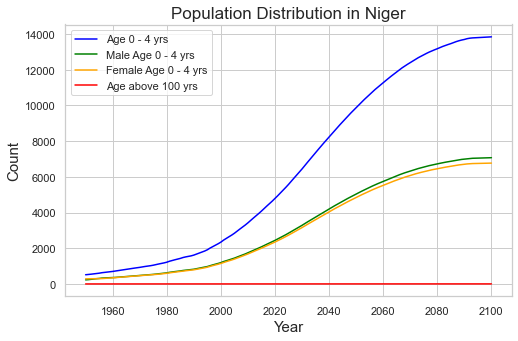

In [275]:
plt.title("Population Distribution in Niger", size = 17)
plt.xlabel("Year", size =15)
plt.ylabel("Count", size =15)
plt.grid("True")

plt.plot(dfNiger.Time, dfNiger.PopTotal_0_4, label = 'Age 0 - 4 yrs',color='blue') 
plt.plot(dfNiger.Time, dfNiger.PopMale_0_4, label = 'Male Age 0 - 4 yrs',color='green') 
plt.plot(dfNiger.Time, dfNiger.PopFemale_0_4, label = 'Female Age 0 - 4 yrs',color='orange')
plt.plot(dfNiger.Time, dfNiger.PopTotal_100Plus, label = 'Age above 100 yrs' ,color='red')
plt.rcParams["figure.figsize"] = [8, 5]
plt.legend()
plt.show()

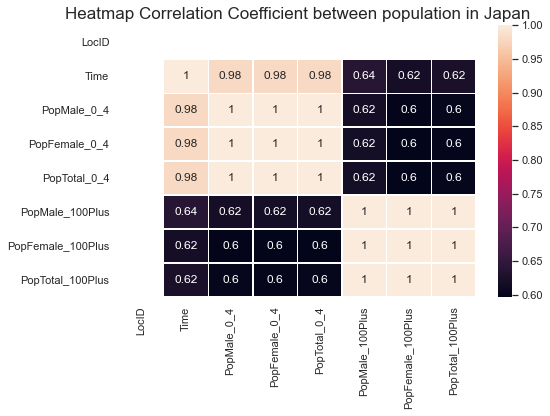

In [277]:
plt.figure(figsize=(8, 5)) # create figure  
sns.set_theme(style="whitegrid") 

# generate heatmap of correlation coefficients 
sns.heatmap(dfNiger.corr(),linewidths = .4, annot = True)  
plt.title("Heatmap Correlation Coefficient between population in Japan", size = 17)
plt.show() # show figure  

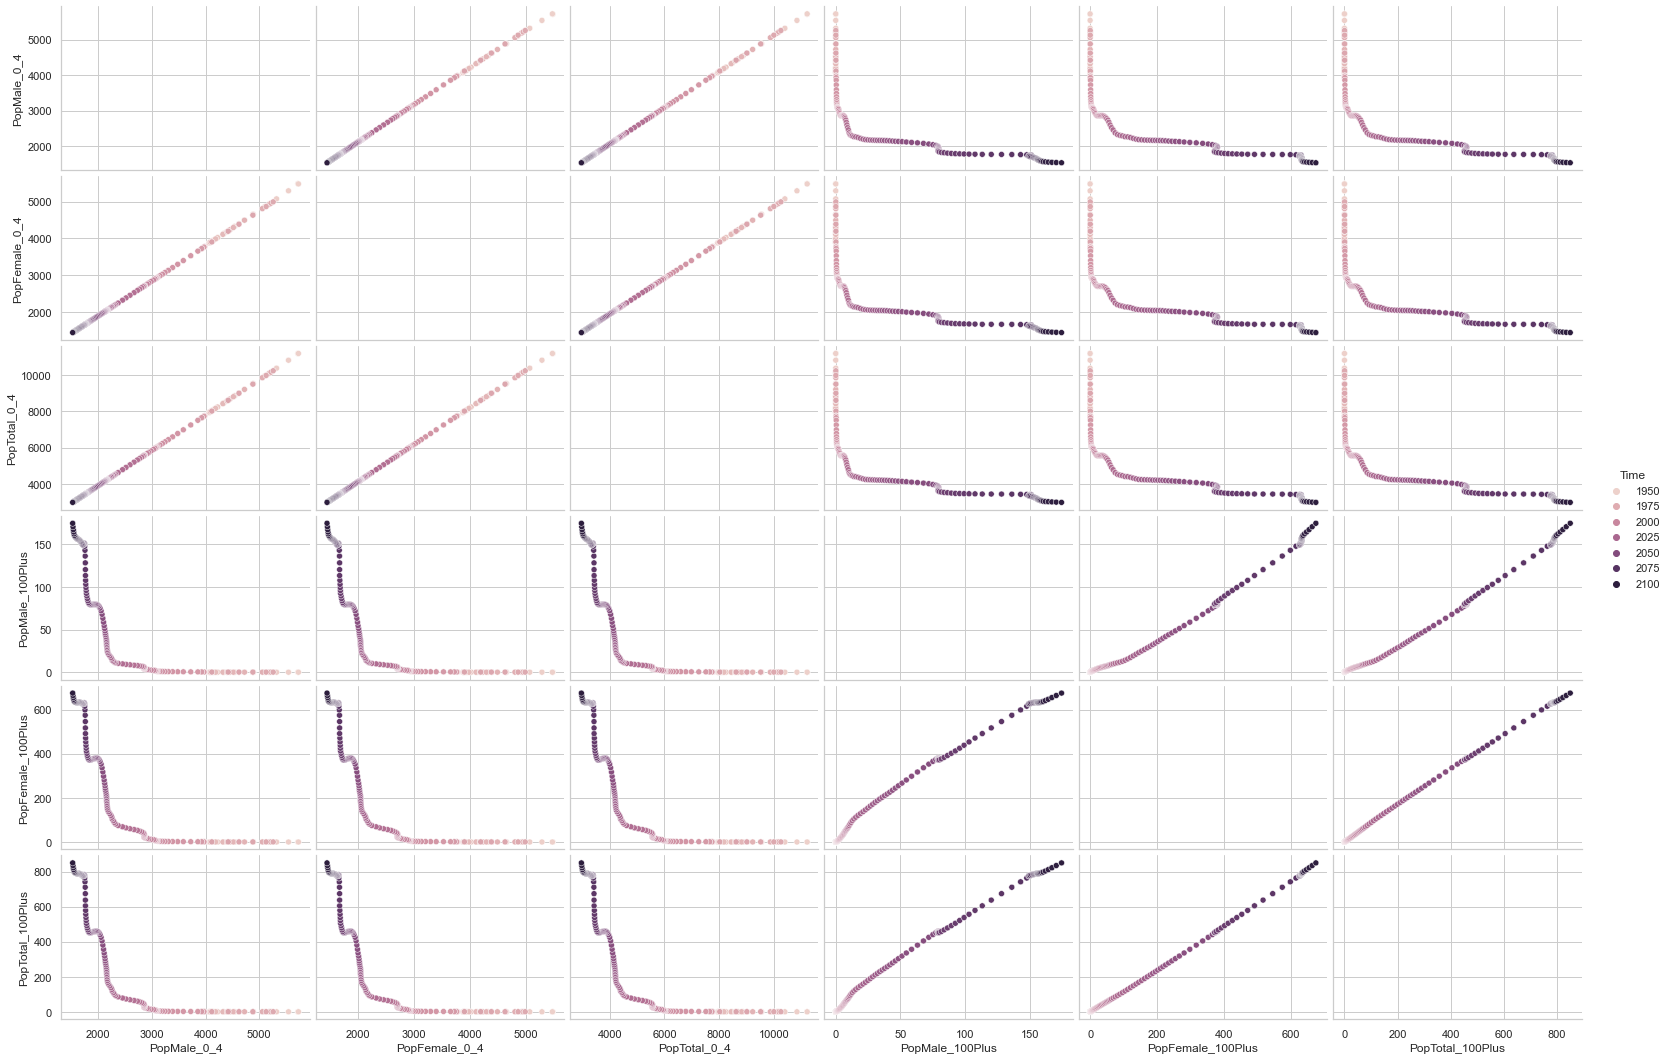

In [253]:
sns.pairplot(dfJapan.drop(['LocID'], axis=1), hue='Time', aspect=1.5)
plt.show()

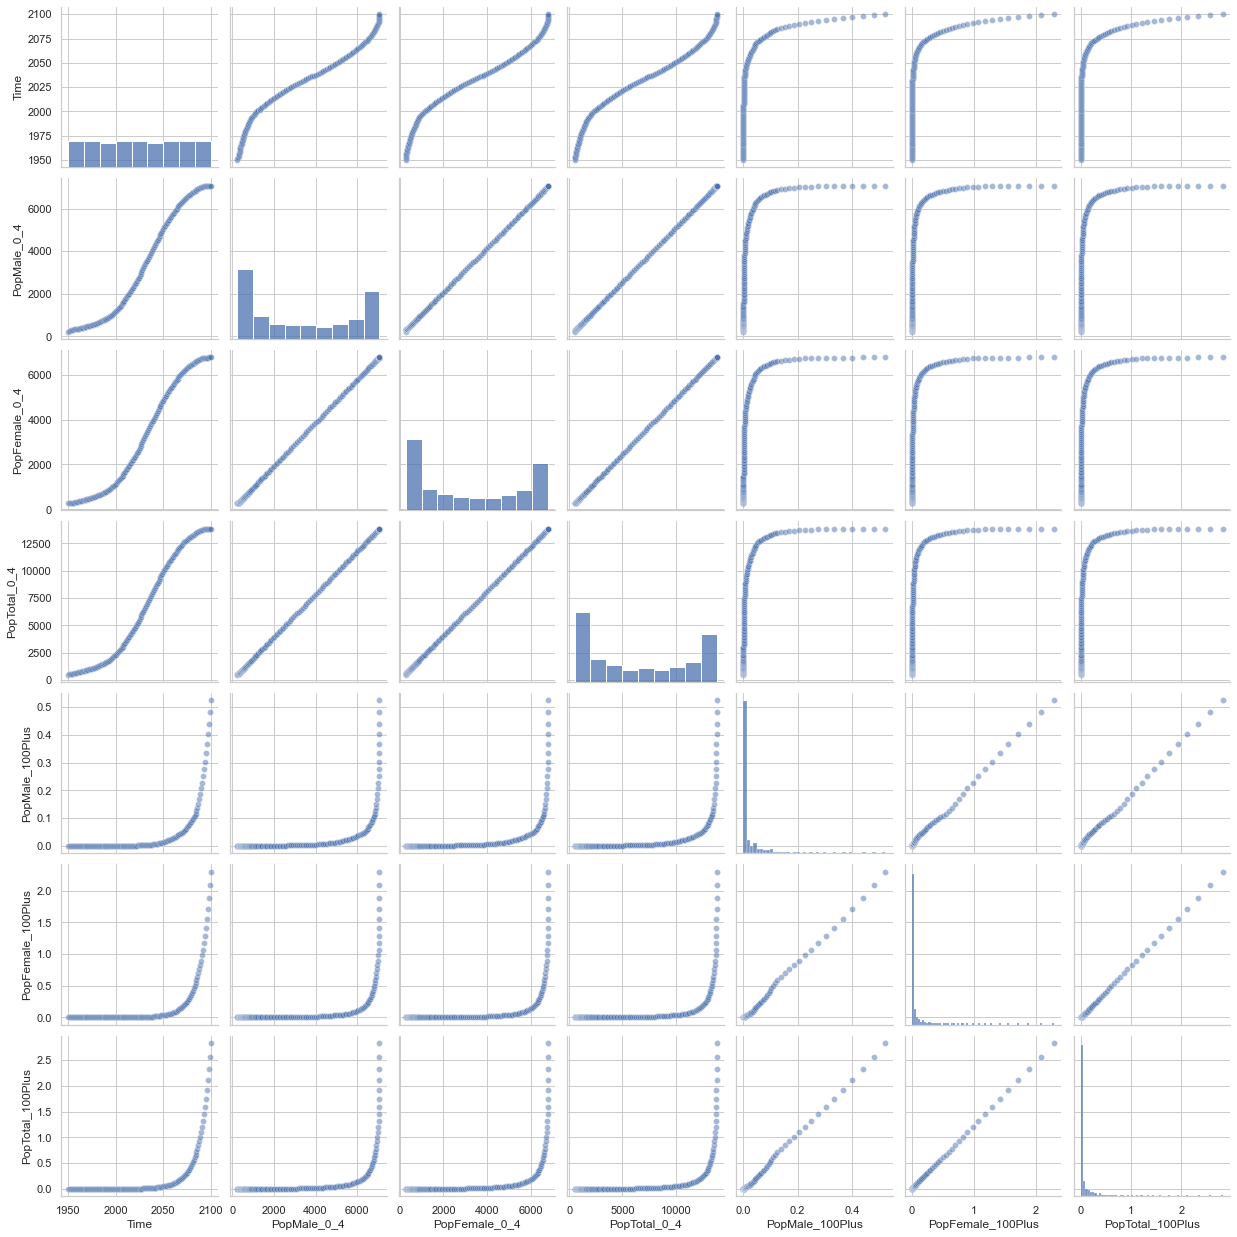

In [359]:
sns.pairplot(data=dfNiger.drop(['LocID'], axis = 1), kind='scatter', plot_kws={'alpha':0.5})
plt.show()